# Práctica 2

### Ejercicio 1
El archivo Hawks.csv contiene mediciones de casi 900 aves de tres especies diferentes. Los datos registrados 
son los siguientes:  
● Epecies. Es la etiqueta de clase e indica la especie de cada gavilán: gavilanes de Cooper (CH), 
gavilanes colirrojos (RT) y gavilanes rastreros (SS).  

● Año. Indica el año en que se avistó el ave.  

● Hallux. Indica la medida en milímetros del hallux (el dedo posterior del pie, que poseen todas las 
aves cazadoras para sujetar mejor a sus presas).  

● Ala. Indica la longitud en milímetros de la pluma más larga del ala.

● Peso. Indica el peso del ave en gramos.  

● Cola. Indica la longitud de la cola del ave en milímetros.
  
a) Calcule la correlación lineal entre los atributos Ala y Cola. Indique la intensidad de la correlación (no hay 
correlación/débil/fuerte) y el tipo (positiva/negativa) 

In [166]:
import pandas as pd 

df = pd.read_csv("hawks.csv", delimiter=";", encoding="latin1")

df["Ala"].corr(df["Cola"])


np.float64(0.8998883674343948)

Valor = 0.8998883674343948

Intensidad = Fuerte (mayor que 0.8)

Tipo = positiva

b) Complete el cuadro con los valores del atributo Hallux antes y después de normalizarlos utilizando media 
y desvío.  

In [167]:
media = df["Hallux"].mean()
desvio = df["Hallux"].std()
minimo = df["Hallux"].min()
maximo = df["Hallux"].max()
q1 = df["Hallux"].quantile(0.25)
q2 = df["Hallux"].quantile(0.5)
q3 = df["Hallux"].quantile(0.75)
ric = q3 - q1
big_sup_rango = q3 + 1.5 * ric
big_sup = df["Hallux"][df["Hallux"] < big_sup_rango].max()
big_inf_rango = q1 - 1.5 * ric
big_inf = df["Hallux"][df["Hallux"] > big_inf_rango].min()

print(f"Media: {media}")
print(f"Desviación Típica: {desvio}")
print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"Rango Intercuartílico: {ric}")
print(f"Bigote Superior: {big_sup}")
print(f"Bigote Inferior: {big_inf}")

Media: 291.77155655095186
Desviación Típica: 321.32404993168916
Mínimo: 95
Máximo: 3414
Q1: 152.0
Q2: 295.0
Q3: 315.0
Rango Intercuartílico: 163.0
Bigote Superior: 545
Bigote Inferior: 95


Compare los valores obtenidos e indique el valor de verdad de las siguientes afirmaciones: 

I. El valor de Q2 normalizado permite afirmar que la media y la mediana tienen valores cercanos. 
VERDADERO

II. El máximo valor de Hallux se encuentra a más de 9 desvíos por encima de la media.
VERDADERO

III. Un hallux que mida más de 600 mm es considerado atípico extremo. FALSO ya que los atipicos extremos arrancan en 804

In [168]:
at_extremo = q3 + 3 * ric  
print(f"Atípico Extremo: {at_extremo}")

Atípico Extremo: 804.0



IV. Un valor normalizado del atributo “hallux” de 2 se considerará un valor atípico extremo.



In [169]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler().fit(df[["Hallux"]])

# Transformar un valor nuevo
nuevo_valor = pd.DataFrame([[600]], columns=["Hallux"])
nuevo_valor_norm = scaler.transform(nuevo_valor)
print(nuevo_valor_norm)

[[0.9597824]]


VERDADERO, arriba de 1,59 es extremo

V. En un gavilán es atípico que su hallux mida menos de 100 mm. 

In [170]:
nuevo_valor = pd.DataFrame([[100]], columns=["Hallux"])
nuevo_valor_norm = scaler.transform(nuevo_valor)
print(nuevo_valor_norm)

[[-0.59715114]]


FALSO, es más alto que -1,1

### Ejercicio 2
El archivo globos.csv contiene el registro de 16 intentos para inflar globos. Los atributos registrados fueron el color del globo, el tamaño, si se estira o no y si la acción de inflarlo fue realizada por un adulto o por un niño. En cada registro se anotó si el globo pudo ser inflado o no. 
Numerice los atributos de la siguiente forma:  
● Color = 1 si es rojo y 0 si es amarillo 

● SeEstira? = 1 para Si y 0 para No 

● Edad = 1 si es adulto y 0 si es Nene 

● Tamanio = 0 si es Chico, 0.5 si es mediano y 1 si es grande 


a) Indique cuáles de los siguientes perceptrones pueden clasificar correctamente todos los ejemplos normalizados del archivo Globos.csv 

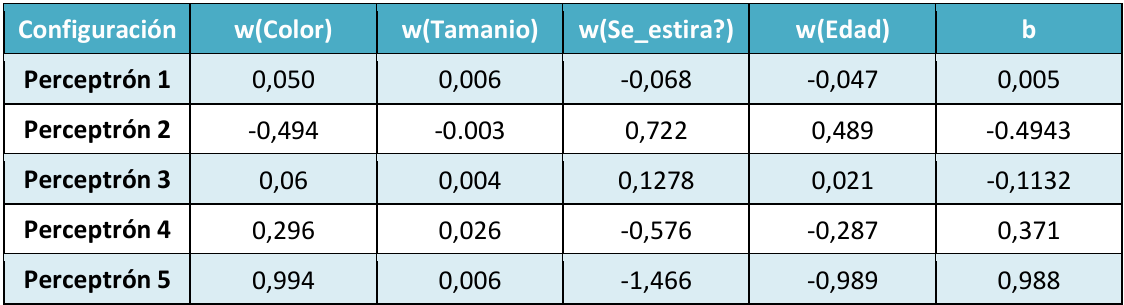

In [171]:
df = pd.read_csv("globos.csv")

# Numerizo
color = {"Rojo": 1, "Amarillo": 0}
df["Color"] = df["Color"].map(color)

seEstira = {"Si": 1, "No": 0}
df["Se_estira?"] = df["Se_estira?"].map(seEstira)

edad = {"Adulto": 1, "Nene": 0}
df["Edad"] = df["Edad"].map(edad)

tamanio = {"Chico": 0, "Mediano": 0.5, "Grande": 1}
df["Tamanio"] = df["Tamanio"].map(tamanio)

df.head(10)

,Color,Tamanio,Se_estira?,Edad,Inflado?
0,0,0.0,1,1,Si
1,0,0.0,1,0,Si
2,0,0.0,0,1,No
3,0,0.0,0,0,No
4,0,1.0,1,1,Si
5,0,1.0,1,0,Si
6,0,0.5,0,1,No
7,0,0.5,0,0,No
8,1,0.0,1,1,Si
9,1,0.0,1,0,No


In [172]:
import numpy as np
from ClassPerceptron import Perceptron

X = df[["Color", "Tamanio", "Se_estira?", "Edad"]].astype(float).values
Y= df["Inflado?"].map({"Si": 0, "No": 1}).astype(int).values 


perceptrones = [ 
    [0.050, 0.006, -0.068, -0.047, 0.005],
    [-0.494, -0.003, 0.722, 0.489, -0.4943],
    [0.06, 0.004, 0.1278, 0.021, -0.1132],      
    [0.296, 0.026, -0.576, -0.287, 0.371],     
    [0.994, 0.006, -1.466, -0.989, 0.988] 
]  

for i, p_vals in enumerate(perceptrones, start = 1):
    p = Perceptron()
    p.w_ = np.array(p_vals[:4]) # Asigno los pesos
    print(p.w_) 
    p.b_ = p_vals[4] # Asigno bias (desvio estandard)

    y_pred = p.predict(X) # Predicción sobre mis datos
    print(y_pred)
    print(Y)

    if np.array_equal(y_pred, Y):
        print(f"Perceptrón {i} clasifica todos los ejemplos correctamente")
    else:
        errores = np.sum(y_pred != Y)
        print(f"Perceptrón {i} no clasifica todos ({errores} errores)")

[ 0.05   0.006 -0.068 -0.047]
[0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 1 no clasifica todos (4 errores)
[-0.494 -0.003  0.722  0.489]
[1 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 2 no clasifica todos (16 errores)
[0.06   0.004  0.1278 0.021 ]
[1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 3 no clasifica todos (14 errores)
[ 0.296  0.026 -0.576 -0.287]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 4 clasifica todos los ejemplos correctamente
[ 0.994  0.006 -1.466 -0.989]
[0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1]
[0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1]
Perceptrón 5 no clasifica todos (1 errores)


b) Indique cuál de los 5 perceptrones del inciso anterior presenta el peor desempeño, es decir, cuál es el 
que clasifica la menor cantidad de ejemplos correctamente. 

El peor es el perceptrón 2

-Dos pesos son positivos grandes (0.722, 0.489).

-Uno es negativo fuerte (-0.494).

-El bias también es negativo (-0.4943).

Eso significa que el perceptrón pone mucho peso en ciertas variables, y con el bias negativo está desplazando la frontera hacia un lugar donde la mayoría de los ejemplos quedan mal clasificados.

### Ejercicio 3
La Tabla 1 muestra información correspondiente de pacientes para determinar si deben realizarse un examen médico en función de su edad, altura y riesgo médico. 
Donde: 
● EDAD es un atributo numérico que indica la edad del paciente. 

● RIESGO es el nivel de riesgo del paciente. 

● EXAMEN indica si debe realizarse un examen extra. 

Para obtener transformar el atributo nominal RIESGO en uno numérico se lo numerizó de la siguiente forma: BAJO = 1, MEDIO = 2 y 
ALTO = 3.

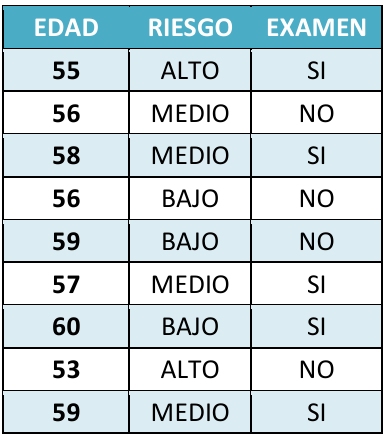

a) Luego de la numerización se calculó el coeficiente de correlación lineal entre los atributos EDAD y RIESGO y se obtuvo como resultado -0.71. ¿Cómo debe interpretarse este valor? 

Se puede decir que tienen una correlación debil (ya que es menor que 0.8 y mayor que 0.5)

b) Luego de numerizar el atributo RIESGO y de normalizar los atributos de manera lineal entre 0 y 1, los 
ejemplos fueron utilizados para entrenar un perceptrón capaz de predecir correctamente el atributo 
EXAMEN. Los pesos obtenidos fueron los siguientes:  

W(EDAD) = 0.0807         W(RIESGO) = 0.074        Sesgo o bias = -0.0742 

¿Cuál será la respuesta del perceptrón para los siguientes valores?[1] 

(EDAD, RIESGO) = (50, BAJO), (51, MEDIO), (54, ALTO) 

In [173]:
def normalize_edad(edad, edad_min=18, edad_max=60):
    return (edad - edad_min) / (edad_max - edad_min)

p = Perceptron()
p.w_ = np.array([0.0807, 0.074])   
p.b_ = -0.0742

riesgo_map = {"Bajo": 0, "Medio": 0.5, "Alto": 1}

valores = [(50, "Bajo"), (51, "Medio"), (54, "Alto")]

for edad, riesgo in valores:
    x_edad = normalize_edad(edad)
    x_riesgo = riesgo_map[riesgo]
    X = np.array([[x_edad, x_riesgo]])
    y_pred = p.predict(X)
    print(f"Predicción para EDAD: {edad}, RIESGO: {riesgo} => {y_pred}")

Predicción para EDAD: 50, RIESGO: Bajo => [0]
Predicción para EDAD: 51, RIESGO: Medio => [1]
Predicción para EDAD: 54, RIESGO: Alto => [1]


### Ejercicio 4
Se busca predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual o no. Se dispone de información correspondiente a las historias clínicas de pacientes atendidos previamente. Las variables relevadas son las siguientes: 

● Age: Edad 

● Sex: Sexo 

● BP (Blood Pressure): Presión sanguínea. 

● Cholesterol: nivel de colesterol.

● K: Nivel de potasio en la sangre. 

● Class: Fármaco suministrado. Cada paciente ha sido medicado con un único fármaco de 5 posibles: DrugA, DrugB, DrugC, DrugX, DrugY 

● Na: Nivel de sodio en la sangre. 

a) Utilice el archivo drug_train.csv para entrenar un perceptrón que sea capaz de predecir si el tipo de fármaco que se debe administrar a un paciente afectado de rinitis alérgica es el habitual (suministro de DrugY) o no.

b) Luego utilice el archivo drug_test.csv para medir la calidad del modelo. 

c) Resuelva el problema: 

● numerizando los atributos ordinales utilizando dos representaciones diferentes: como entero único 
y de manera binaria (dummy). 

● Normalizando de diferentes formas: Sin normalizar, normalización lineal, normalización con media y 
desvío 

In [174]:
import sklearn

# Cargar el dataset correcto antes de numerizar
df = pd.read_csv("drugs_train.csv")

# Numerizo valores
df['Age'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))
sex = {"M": 0, "F": 1}
df["Sex"] = df["Sex"].map(sex)
bp = {"HIGH": 1, "NORMAL": 0, "LOW": -1}
df["BP"] = df["BP"].map(bp)
cholesterol = {"HIGH": 1, "NORMAL": 0, "LOW": -1}
df["Cholesterol"] = df["Cholesterol"].map(cholesterol)
drug = {"drugA": 0, "drugB": 0, "drugC": 0, "drugX": 0, "drugY": 1}
df["Drug"] = df["Drug"].map(drug)
df['Na'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Na'].values.reshape(-1, 1))
df['K'] = sklearn.preprocessing.StandardScaler().fit_transform(df['K'].values.reshape(-1, 1))
df.head(10)


,Age,Sex,BP,Cholesterol,Na,K,Drug
0,-1.697812,0,-1,1,0.367718,0.642032,0
1,-0.161397,1,1,1,-1.432057,-1.476815,1
2,-0.693233,1,-1,1,1.357422,-1.460230,1
3,0.134067,0,-1,1,-0.024780,1.051328,0
4,0.665903,1,1,1,0.435842,-1.231922,1
5,-1.106883,1,1,0,0.701494,0.737658,0
6,1.315924,1,0,1,0.730001,-0.081106,1
7,-0.161397,0,-1,1,0.479895,-0.755880,1
8,0.488624,0,-1,1,-0.699641,-1.384553,1
9,1.197739,0,1,0,-0.554247,0.303195,0


In [175]:
p = Perceptron(alpha=0.1, n_iter=250)
X = df.drop("Drug", axis=1).values
y = df["Drug"].values
p.fit(X, y)

df = pd.read_csv("drugs_train.csv")

df['Age'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Age'].values.reshape(-1, 1))
sex = {"M": 0, "F": 1}
df["Sex"] = df["Sex"].map(sex)
bp = {"HIGH": 1, "NORMAL": 0, "LOW": -1}
df["BP"] = df["BP"].map(bp)
cholesterol = {"HIGH": 1, "NORMAL": 0, "LOW": -1}
df["Cholesterol"] = df["Cholesterol"].map(cholesterol)
drug = {"drugA": 0, "drugB": 0, "drugC": 0, "drugX": 0, "drugY": 1}
df["Drug"] = df["Drug"].map(drug)
df['Na'] = sklearn.preprocessing.StandardScaler().fit_transform(df['Na'].values.reshape(-1, 1))
df['K'] = sklearn.preprocessing.StandardScaler().fit_transform(df['K'].values.reshape(-1, 1))

X = df.drop("Drug", axis=1).values
y = df["Drug"].values

y_pred = p.predict(X)
aciertos = np.sum(y_pred == y)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X.shape[0]))
print(y_pred)
print(y)


Aciertos: 160
% de aciertos = 100.00 %
[0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1]
[0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 0 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0
 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 1 1 1 1]


### Ejercicio 5
El archivo semillas.csv contiene información de granos que pertenecen a tres variedades diferentes de trigo: Kama, Rosa y Canadiense. El total es de 210 ejemplos a razón de 70 ejemplos para cada tipo de grano, seleccionados al azar para el experimento. La información registrada corresponde al resultado de la visualización de alta calidad de la estructura interna del núcleo efectuada utilizando una técnica de rayos X blandos. Este tipo de estudio no es destructivo y es considerablemente más económico que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se grabaron en placas KODAK de rayos x de 13x18 cm. Los estudios se realizaron utilizando granos de trigo cosechados combinados procedentes de campos experimentales, explorados en el Instituto de Agrofísica de la Academia Polaca de Ciencias en Lublin. Para construir los datos, se midieron siete parámetros geométricos de cada grano de trigo:

● área A 

● perímetro P 

● compacidad C = 4 * pi * A / P ^ 2 

● longitud del núcleo 

● ancho del núcleo 

● coeficiente de asimetría 

● longitud del surco del núcleo

A partir de los 210 ejemplos, luego de normalizarlos utilizando los valores de media y desvío, se logró entrenar 
un perceptrón capaz de identificar, con una precisión del 100%, uno de los tres tipos de semillas. Para realizar 
el entrenamiento se utilizó una velocidad de aprendizaje de 0.05 y un máximo de 200 iteraciones. Indique 
cuál es el tipo de semilla que puede ser reconocido correctamente por un perceptrón. 

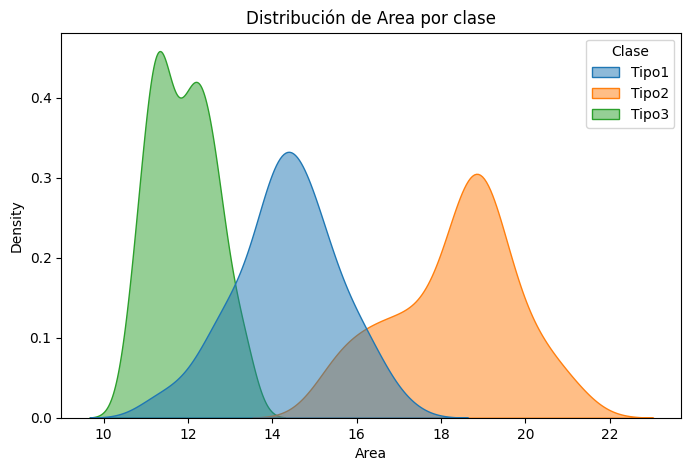

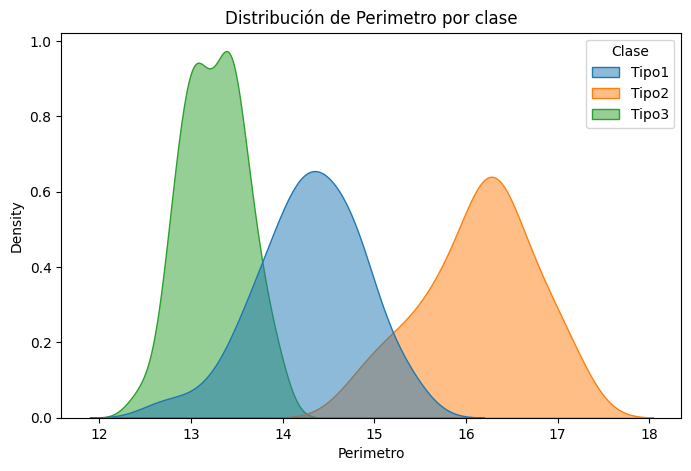

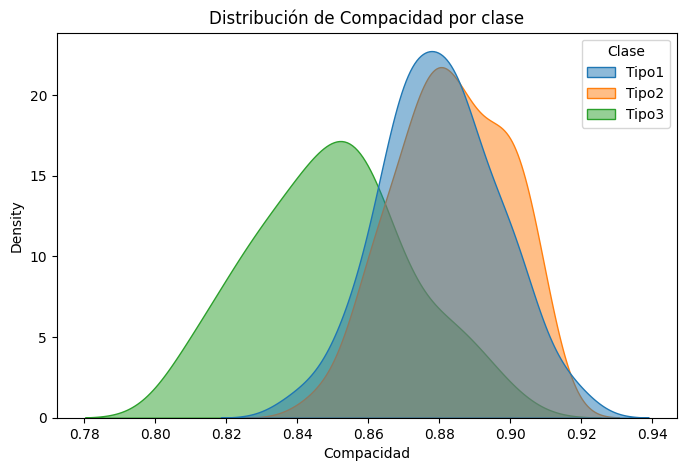

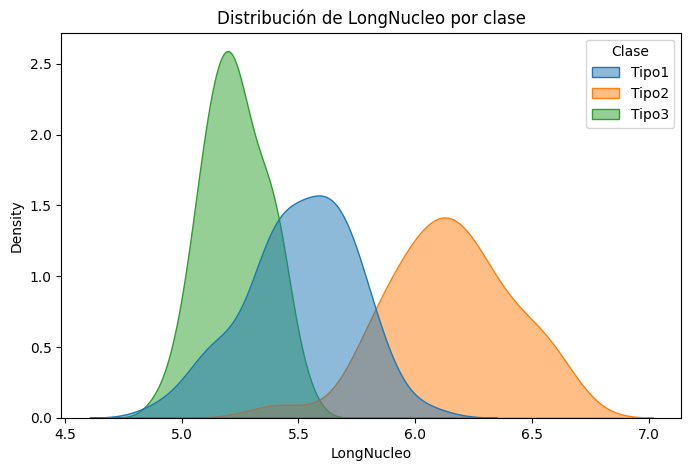

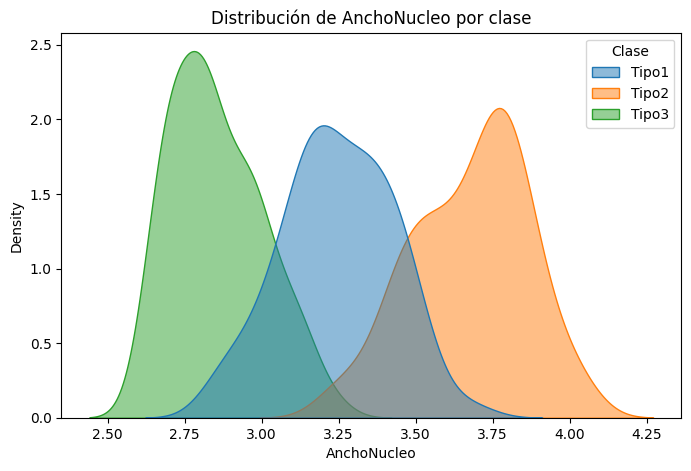

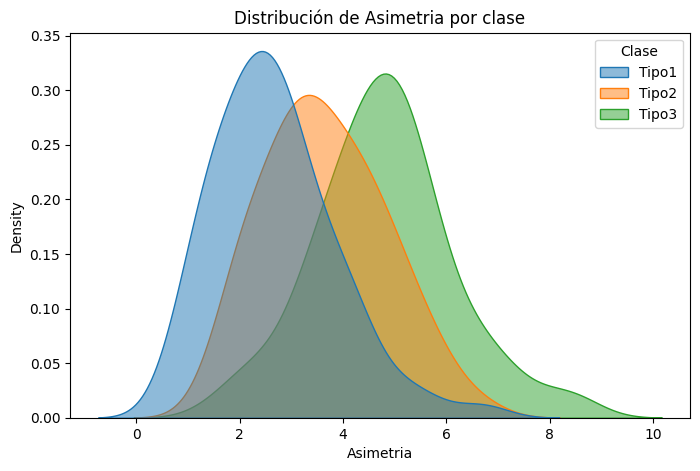

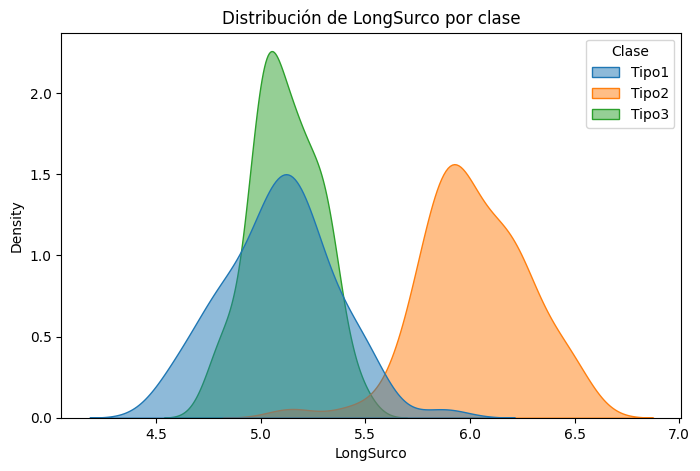

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("semillas.csv")
features = df.columns[:-1]  # todas las columnas menos "Clase"

for col in features:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df, x=col, hue="Clase", fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribución de {col} por clase")
    plt.show()

Es el tipo 2 ya que es el más separado

### Ejercicio 6
El archivo zoo.csv contiene información de 101 animales caracterizados por los siguientes atributos     
A1. Nombre del animal 
A2. Tiene Pelo  
A3. Plumas  
A4. Huevos  
A5. Leche 
A6. Vuela 
A7. Acuático 
A8. Depredador 
A9. Dentado 
A10. Vertebrado 
A11. Branquias   
A12. Venenoso  
A13. Aletas 
A14. Patas 
A15. Cola 
A16. Domestico 
A17. Tamaño gato 
A18. Clase

Salvo los atributos A1 y A18 que contienen texto y el A14 que contiene el número de patas del animal, el 
resto toma el valor 1 si el animal posee la característica y 0 si no. Hay 7 valores de clase posible (atributo 
A18): mamífero, ave, pez, invertebrado, insecto, reptil y anfibio. 

a) Realice un gráfico que visualice de la cantidad de ejemplos por cada valor del atributo clase y analice 
que tipos de problema podrían surgir al entrenar un modelo para clasificación. 

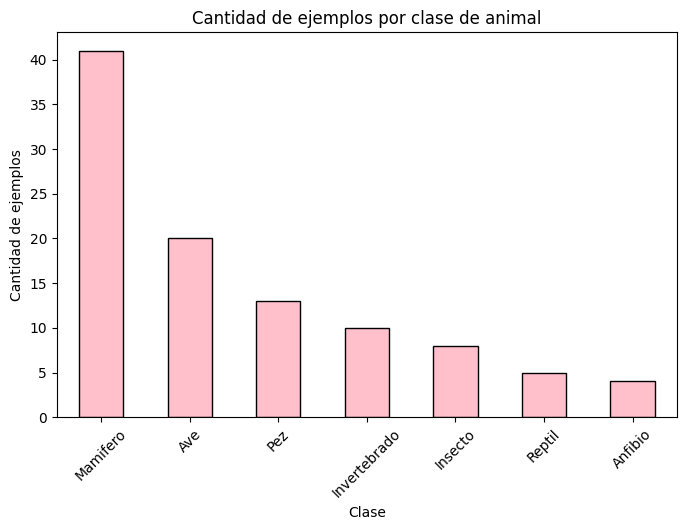

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("zoo.csv", encoding="latin1")

clase_counts = df["Clase"].value_counts()

plt.figure(figsize=(8,5))
clase_counts.plot(kind="bar", color="pink", edgecolor="black")
plt.title("Cantidad de ejemplos por clase de animal")
plt.xlabel("Clase")
plt.ylabel("Cantidad de ejemplos")
plt.xticks(rotation=45)
plt.show()

El problema va a ser que hay muchos más ejemplos para mamíferos que para otras clases generando un desbalance de clases.

b) Utilice todos los ejemplos para entrenar un perceptrón que sea capaz de reconocer si un animal es un 
mamífero. Entrene varias veces si es necesario y verifique que funcione correctamente. 

In [178]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv("zoo.csv", encoding="latin1")

# Numerizo clase
clase = {"Mamifero": 0, "Ave": 1, "Reptil": 1, "Pez": 1, "Anfibio": 1, "Insecto": 1, "Invertebrado": 1 }
df["Clase"] = df["Clase"].map(clase)

# X e Y
X = df.drop(columns= ["Clase", "animal"]).astype(float).values
y = df["Clase"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizo
normalizador= preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(y_pred)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1]
Aciertos: 30
% de aciertos = 96.77 %


c) Observe los pesos del perceptrón entrenado en a) ¿Puede determinar cuáles son las características más 
relevantes para decidir si se trata de un mamífero o no? Realice varias ejecuciones independientes y 
observe si las características más relevantes siguen siendo las mismas. 

Tengo que fijarme que características tienen los valores mas altos

In [179]:
# Veo características más importantes
for elem, val in zip(df.columns[1:-1], p.w_):
    print(f"{elem}: {val}")

Tiene_Pelo: -0.8568515246061605
Tiene_Plumas: -0.40765426561548174
Nace_de_huevo: 0.774098264349864
Toma_Leche: -0.5531291333662071
Vuela: 0.11684803763103524
Acuatico: 0.21378877663676746
Depredador: 0.17589575912667127
Dentado: 0.11767084076312537
Vertebrado: -0.08378893210945915
Respira: -0.2103455794545362
Venenoso: -0.06641295444272444
Tiene_Aletas: 0.025557620983625864
Cant_Patas: 0.034430212059060605
Tiene_Cola: 0.04236023363423003
Domestico: -0.19509990708470026
Tamano_Gato: -0.4419164837468234


d) Repita b) y c) para las aves.

In [180]:
df = pd.read_csv("zoo.csv", encoding="latin1")

# Numerizo clase
clase = {"Mamifero": 1, "Ave": 0, "Reptil": 1, "Pez": 1, "Anfibio": 1, "Insecto": 1, "Invertebrado": 1 }
df["Clase"] = df["Clase"].map(clase)

# X e Y
X = df.drop(columns= ["Clase", "animal"]).astype(float).values
y = df["Clase"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizo
normalizador= preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(y_pred)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))

# Veo características más importantes
for elem, val in zip(df.columns[1:-1], p.w_):
    print(f"{elem}: {val}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0]
Aciertos: 31
% de aciertos = 100.00 %
Tiene_Pelo: 0.3063088605818043
Tiene_Plumas: -0.731331261013676
Nace_de_huevo: -0.30229633295920444
Toma_Leche: -0.3705690895753977
Vuela: -0.3480900015524118
Acuatico: 0.15874143601205193
Depredador: -0.09945286116234334
Dentado: 0.06518731675380132
Vertebrado: -0.6291933605568252
Respira: -0.17101992971494068
Venenoso: 0.11170184538545813
Tiene_Aletas: -0.4451937359519458
Cant_Patas: -0.41580707489297164
Tiene_Cola: -0.24497810195740266
Domestico: -0.11115780597491268
Tamano_Gato: -0.19327264212545542


e) Repita b) y c) para los reptiles.

In [181]:
df = pd.read_csv("zoo.csv", encoding="latin1")

# Numerizo clase
clase = {"Mamifero": 1, "Ave": 1, "Reptil": 0, "Pez": 1, "Anfibio": 1, "Insecto": 1, "Invertebrado": 1 }
df["Clase"] = df["Clase"].map(clase)

# X e Y
X = df.drop(columns= ["Clase", "animal"]).astype(float).values
y = df["Clase"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizo
normalizador= preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(y_pred)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))

# Veo características más importantes
for elem, val in zip(df.columns[1:-1], p.w_):
    print(f"{elem}: {val}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1]
Aciertos: 28
% de aciertos = 90.32 %
Tiene_Pelo: 0.45815189324857886
Tiene_Plumas: 0.45814002725545583
Nace_de_huevo: -0.047112629792609245
Toma_Leche: -0.09460161552207548
Vuela: 0.2925553991472425
Acuatico: 0.38864668955601056
Depredador: 0.021229376835953273
Dentado: 0.003054121525349368
Vertebrado: -0.2802504105266793
Respira: -0.5957701082674258
Venenoso: -0.22736194309573288
Tiene_Aletas: 0.07007920211166974
Cant_Patas: 0.019548426324754335
Tiene_Cola: -0.2921082844935682
Domestico: -0.0015936041426580089
Tamano_Gato: 0.03983161487877106


### Ejercicio 7
El archivo automobile_simple.csv contiene 11 atributos de automóviles de un total de 205 registros. Es una versión modificada 
y simplificada del dataset disponible en el repositorio UCI https://archive.ics.uci.edu/ml/datasets/Automobile. La siguiente tabla contiene una breve descripción de los atributos que contiene el archivo y caracterizan a cada vehículo.

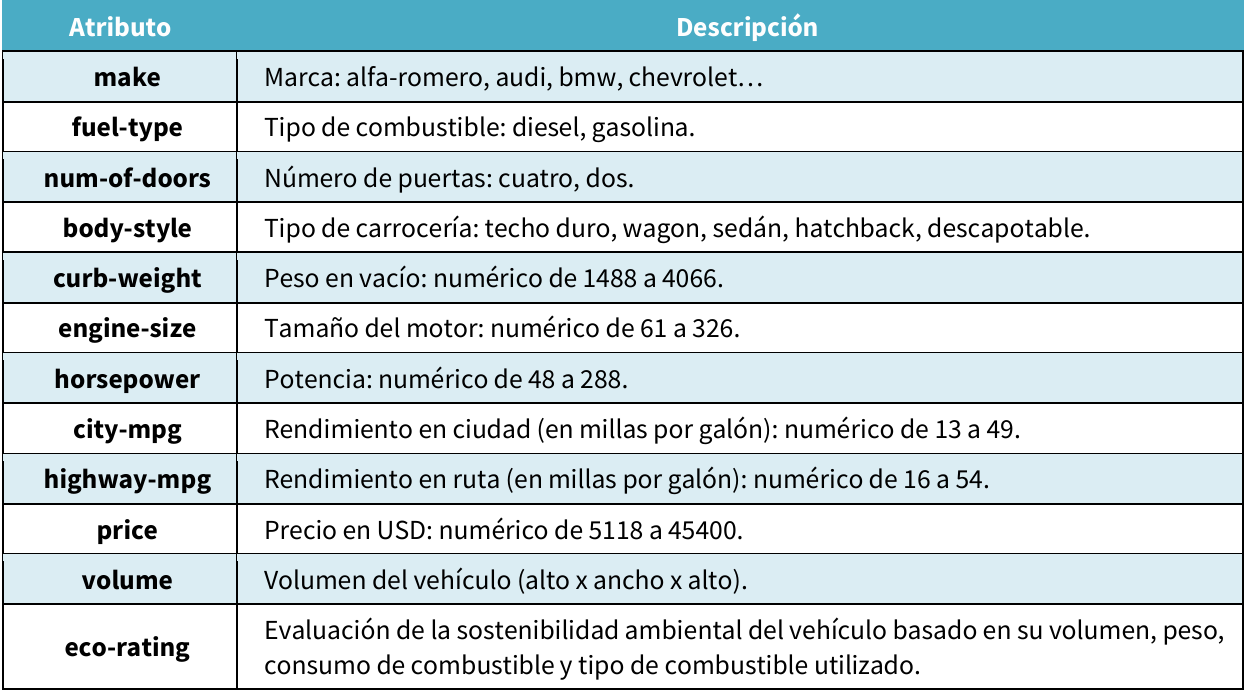

a) Para cada atributo indique si es Discreto, Continuo, Nominal u Ordinal. 

    -make: nominal
    -fuel-type: nominal
    -num-of-doors: discreta
    -body-style: nominal
    -curb-weight: continua
    -engine-size: continua
    -horsepower: continua
    -city-mpg: continua
    -highway-mpg: continua
    -price: continua
    -volume: ordinal
    -eco-raiting: continua

b) Elimine los registros que presenten valores faltantes. 

In [182]:
df = pd.read_csv("automobile-simple.csv")

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

c) Calcule la matriz de correlación usando los atributos numéricos. 

<Axes: >

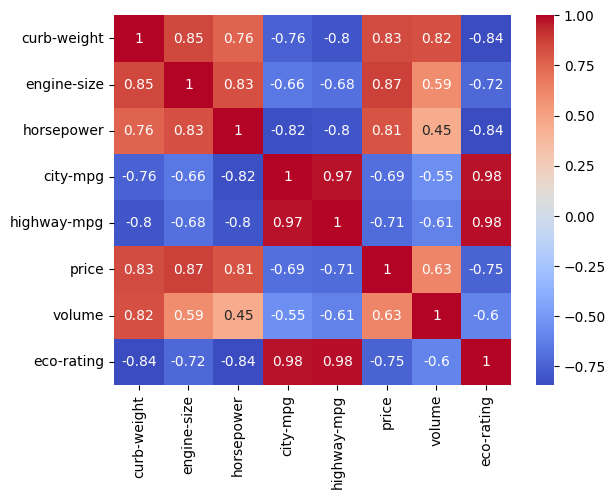

In [183]:
numericas = df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numericas.corr(), annot=True, cmap="coolwarm")

d) Realice el entrenamiento de un perceptrón para que aprenda a clasificar si un auto es ecológico. Tenga en cuenta los siguientes pasos: 

I. Utilice el atributo eco-rating para generar un nuevo atributo binario que determine si un auto es ecológico o no. Un auto es considerado ecológico si el valor de eco-rating supera la media de dicho atributo.

II. Genere y compare 3 modelos utilizando diferentes normalizaciones (Sin normalizar, normalización lineal, normalización estándar. 

III.Teniendo en cuenta la matriz de correlación del punto c) repita el punto II) eliminando dos atributos fuertemente correlacionados (uno negativo y otro positivo). Compare y reflexione sobre los resultados obtenidos.

In [184]:
# Nuevo atributo Ecológico
media = df["eco-rating"].mean()
df["Ecológico"] = (df["eco-rating"] > media).astype(int)

df.head()

,make,fuel-type,num-of-doors,body-style,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,price,volume,eco-rating,Ecológico
0,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,13495.0,528019.904,33.297462,0
1,alfa-romero,gas,two,convertible,2548,130,111.0,21,27,16500.0,528019.904,33.297462,0
2,alfa-romero,gas,two,hatchback,2823,152,154.0,19,26,16500.0,587592.640,30.898272,0
3,audi,gas,four,sedan,2337,109,102.0,24,30,13950.0,634816.956,42.697819,1
4,audi,gas,four,sedan,2824,136,115.0,18,22,17450.0,636734.832,27.997459,0


Sin Normalizar

In [185]:
# Numerizo 
df["make"] = df["make"].astype('category').cat.codes
df["fuel-type"] = df["fuel-type"].astype('category').cat.codes
df["body-style"] = df["body-style"].astype('category').cat.codes
num = {"two": 2, "four": 4}
df["num-of-doors"] = df["num-of-doors"].map(num)

# X e Y 
X = df.drop(columns=["Ecológico"]).values
y = df["Ecológico"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))


Aciertos: 34
% de aciertos = 56.67 %


Normalización Standar

In [186]:
df = pd.read_csv("automobile-simple.csv")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
media = df["eco-rating"].mean()
df["Ecológico"] = (df["eco-rating"] > media).astype(int)

# Numerizo 
df["make"] = df["make"].astype('category').cat.codes
df["fuel-type"] = df["fuel-type"].astype('category').cat.codes
df["body-style"] = df["body-style"].astype('category').cat.codes
num = {"two": 2, "four": 4}
df["num-of-doors"] = df["num-of-doors"].map(num)

# X e Y 
X = df.drop(columns=["Ecológico"]).values
y = df["Ecológico"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizo
normalizador= preprocessing.StandardScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))


Aciertos: 59
% de aciertos = 98.33 %


Normalización lineal

In [187]:
df = pd.read_csv("automobile-simple.csv")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
media = df["eco-rating"].mean()
df["Ecológico"] = (df["eco-rating"] > media).astype(int)

# Numerizo 
df["make"] = df["make"].astype('category').cat.codes
df["fuel-type"] = df["fuel-type"].astype('category').cat.codes
df["body-style"] = df["body-style"].astype('category').cat.codes
num = {"two": 2, "four": 4}
df["num-of-doors"] = df["num-of-doors"].map(num)

# X e Y 
X = df.drop(columns=["Ecológico"]).values
y = df["Ecológico"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizo lineal
normalizador= preprocessing.MinMaxScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))


Aciertos: 58
% de aciertos = 96.67 %


Elimino fuertemente correlacionado con normalización lineal

In [188]:
df = pd.read_csv("automobile-simple.csv")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
media = df["eco-rating"].mean()
df["Ecológico"] = (df["eco-rating"] > media).astype(int)

# Elimino fuertemente correlacionado
df.drop(columns=["engine-size","horsepower"], inplace=True)

# Numerizo 
df["make"] = df["make"].astype('category').cat.codes
df["fuel-type"] = df["fuel-type"].astype('category').cat.codes
df["body-style"] = df["body-style"].astype('category').cat.codes
num = {"two": 2, "four": 4}
df["num-of-doors"] = df["num-of-doors"].map(num)

# X e Y 
X = df.drop(columns=["Ecológico"]).values
y = df["Ecológico"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizo lineal
normalizador= preprocessing.MinMaxScaler()
X_train = normalizador.fit_transform(X_train)
X_test = normalizador.transform(X_test)

# Entrenamiento
p = Perceptron(alpha=0.1, n_iter=1000)
p.fit(X_train, y_train)

# Verifico
y_pred = p.predict(X_test)
aciertos = np.sum(y_pred == y_test)
print(f"Aciertos: {aciertos}")
print("%% de aciertos = %.2f %%" % (100 * aciertos / X_test.shape[0]))

Aciertos: 57
% de aciertos = 95.00 %
